## Table of Contents 

### 1. Importing libraries and data
### 2. Data Wrangling
### 3. The elbow technique
### 4. k-means clustering


### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Create a project folder string

path = r'/Users/nora/Desktop/CareerFoundry Achievement 6'

In [4]:
# Import the data set

df_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'airbnb_clean.csv'))

### 2. Data Wrangling

In [5]:
df_clean.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,no_reviews
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,False
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,False
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,True
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,False
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,False


In [6]:
# Drop unnecessary and categorical columns 

df_cluster = df_clean.drop(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'room_type', 'neighbourhood', 'last_review', 'no_reviews'], 1)

In [7]:
df_cluster.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [55]:
# Check for missing values 

df_cluster.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df_cluster.shape

(48894, 8)

In [56]:
# Create a subset with the missing values

df_nan = df_cluster[df_cluster['reviews_per_month'].isnull() == True]

In [57]:
df_nan

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,40.80902,-73.94190,150,3,0,NaN,1,365
19,40.79685,-73.94872,190,7,0,NaN,2,249
26,40.86754,-73.92639,80,4,0,NaN,1,0
36,40.68876,-73.94312,35,60,0,NaN,1,365
38,40.63702,-73.96327,150,1,0,NaN,1,365
...,...,...,...,...,...,...,...,...
48889,40.67853,-73.94995,70,2,0,NaN,2,9
48890,40.70184,-73.93317,40,4,0,NaN,2,36
48891,40.81475,-73.94867,115,10,0,NaN,1,27
48892,40.75751,-73.99112,55,1,0,NaN,6,2


In [58]:
# I am replaceing the missing values in the reviews per month column with 0. 

df_cluster['reviews_per_month'] = df_cluster['reviews_per_month'].replace(np.nan, 0)

In [59]:
df_cluster.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### 3. The elbow technique

In [63]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [65]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3837744796.195602,
 -2385976074.283496,
 -1644713034.2477784,
 -1120662026.9493482,
 -845579105.7734249,
 -720658030.6847229,
 -628224278.7028153,
 -541278494.4443367,
 -476493703.0567653]

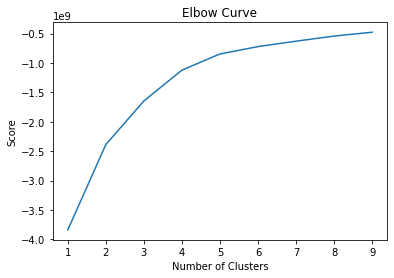

In [67]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### It's a bit hard to interpret this visual since the curve is quite rounded. The curve straightens out after 5 clusters but it's only a small jump between 4 and 5. I tried using 5 clusters but I didn't see any difference between two of the clusters to I decided to use 4 clusters instead.

### 4. k-means clustering

In [68]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [70]:
# Fit the k-means object to the data.

kmeans.fit(df_cluster)

/Users/nora/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [72]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

/Users/nora/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [73]:
df_cluster.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,clusters
0,40.64749,-73.97237,149,1,9,0.21,6,365,2
1,40.75362,-73.98377,225,1,45,0.38,2,355,2
2,40.80902,-73.94190,150,3,0,0.00,1,365,2
3,40.68514,-73.95976,89,1,270,4.64,1,194,2
4,40.79851,-73.94399,80,10,9,0.10,1,0,0


In [74]:
df_cluster['clusters'].value_counts()

0    31947
2    16015
3      889
1       43
Name: clusters, dtype: int64

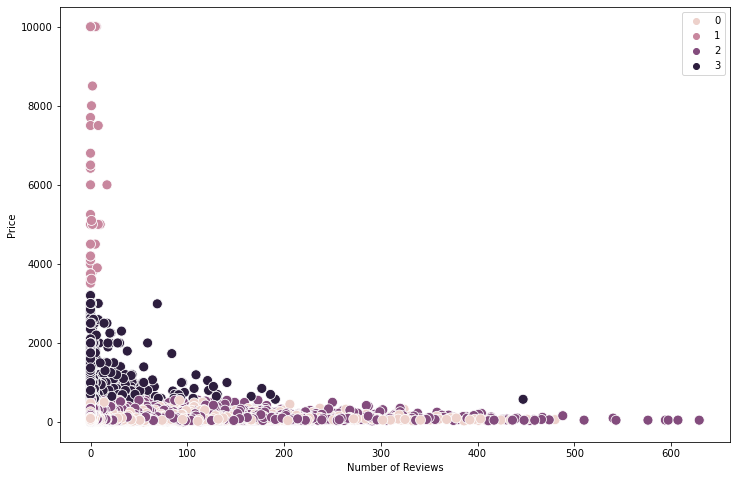

In [75]:
# Plot the clusters for the "Price" and "number_of_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['number_of_reviews'], y=df_clean['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Reviews') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

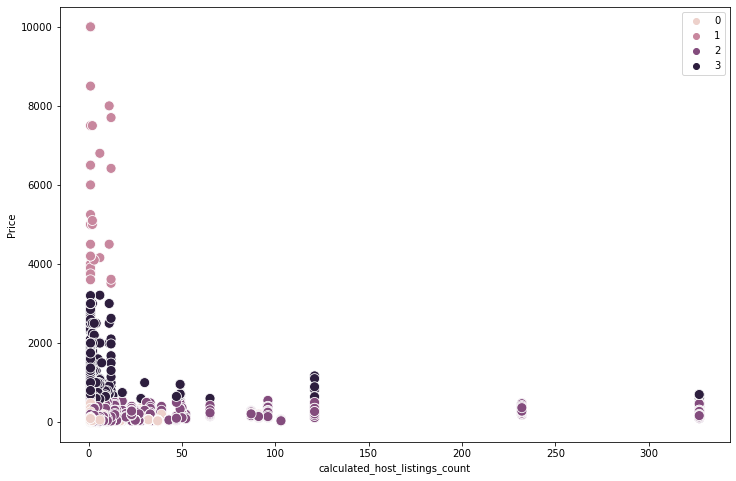

In [77]:
# Plot the clusters for the "calculated_host_listings_count" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['calculated_host_listings_count'], y=df_clean['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('calculated_host_listings_count') 
plt.ylabel('Price') 
plt.show()

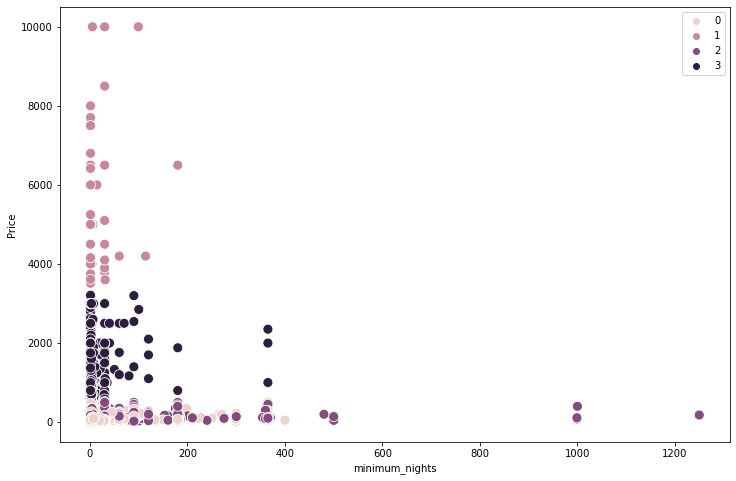

In [78]:
# Plot the clusters for the "minimum_nights" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['minimum_nights'], y=df_clean['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('minimum_nights') 
plt.ylabel('Price') 
plt.show()

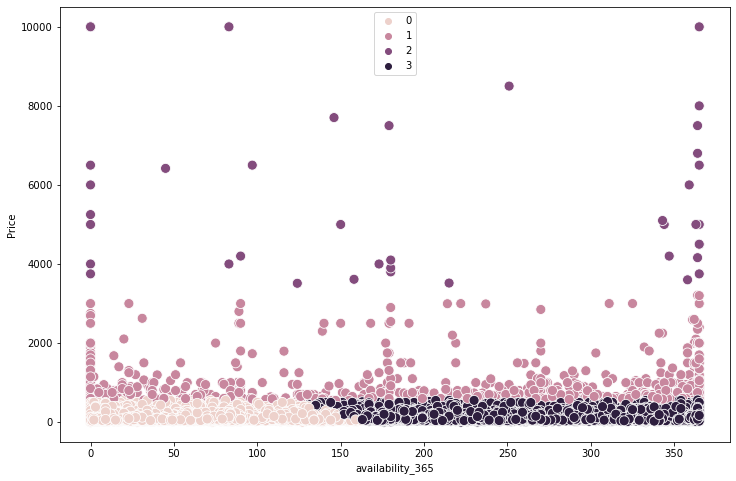

In [24]:
# Plot the clusters for the "availability_365" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['availability_365'], y=df_clean['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('availability_365') 
plt.ylabel('Price') 
plt.show()

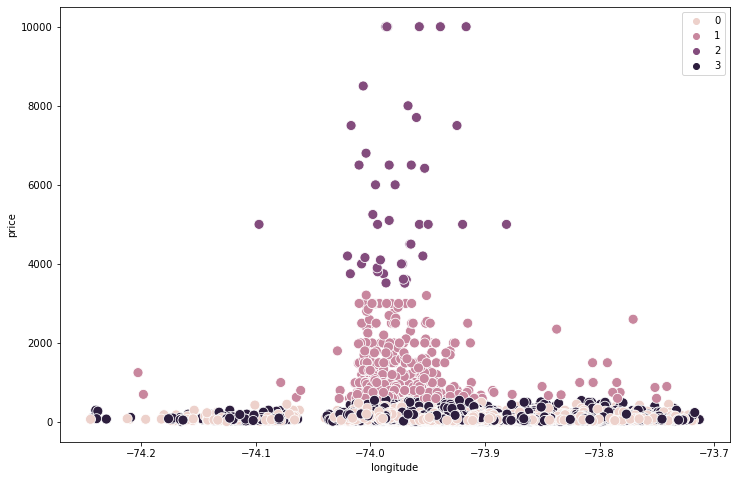

In [25]:
# Plot the clusters for the "longitude" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['longitude'], y=df_clean['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('longitude') 
plt.ylabel('price') 
plt.show()

### Interpretation of Plots:
The cluster with color code 2 has the highest prices. The dark purple cluster (coded as 3 in the legend) is in the middle in terms of prices. The two light pink clusters (0 and 1) are the same in terms of prices. 

In the first scatter plot, we can see that the darker clusters are represented more on the left, meaning that the expensive listings don't tend to have many reviews.

In terms of calculated_host_listings, I am not getting much insight from the scatterplot, except that there are no points from cluster 2 on the right, which means that hosts with very high priced listings don't tend to have many listings. 

In terms of minimum_nights, there are no expensive listings (color 2 and 3) on the right, which means that the listings with a high number of minimum_nights tend to be the cheaper ones. 

I can see a grouping of cheap listings with a low availability (color 0) and a high availability (color 2) in the second to last plot. Availability does not seem to have an impact on price or any other variable. 

In terms of longitude, I can see that the dark clusters are gather at a specific longitude (around -74.0). This means that most of the very expensive listings are in the same area.


In [76]:
df_cluster.groupby('clusters').agg({'latitude':['mean', 'median'], 
                         'longitude':['mean', 'median'], 
                         'price':['mean', 'median'],
                          'minimum_nights':['mean', 'median'],
                          'number_of_reviews':['mean', 'median'],
                          'reviews_per_month':['mean', 'median'],
                          'calculated_host_listings_count':['mean', 'median'],
                          'availability_365':['mean', 'median'], })

latitude            longitude                  price         \
               mean    median       mean    median         mean median   
clusters                                                                 
0         40.729084  40.72188 -73.953644 -73.95572   125.120543    100   
1         40.730272  40.73046 -73.978101 -73.98367  5845.860465   5000   
2         40.728299  40.72557 -73.947876 -73.95410   147.168030    120   
3         40.735691  40.73999 -73.975233 -73.98051   969.273341    799   

         minimum_nights        number_of_reviews        reviews_per_month  \
                   mean median              mean median              mean   
clusters                                                                    
0              5.141046      2         17.770745      4          0.939897   
1             21.232558      2          1.953488      0          0.246279   
2             10.653887      3         35.007056     10          1.416040   
3              8.946007      3         10.579303      1          0.636862   

                calculated_host_listings_count        availability_365         
         median                           mean median             mean median  
clusters                                                                       
0          0.26                       2.127868      1        26.155570      0  
1          0.00                       3.093023      1       190.186047    179  
2          0.79                      17.036091      2       281.361286    297  
3          0.12                       9.393701      1       184.896513    199

### Discussion of Clusters (from most expensive to cheapest) 

#### Cluster 1:  
##### Type: Very Expensive, lower Manhattan, rented out 50% of the time
These are the most expensive listings. Many are located in lower Manhattan and the mean minimum number of nights is the highest. They have the lowest number of reviews and the lowest calculated_host_listings_count. In terms of availability, they are available approximately half of the year. Maybe these listings are somebodies holiday home or belong to someone who has two homes and are rented out when the owner is not there.  

#### Cluster 3:   
##### Type: Expensive, lower Manhattan, rented out 50% of the time
These are the second most expensive listings. They are also located in lower Manhattan. They are way more expensive than clusters 0 and 1 but a lot cheaper than cluster 2. In terms of number of reviews they have the second lowest number of reviews after cluster 2. The calculated_host_listings_count is the second highest after cluster 1. The number of minimum_nights is somewhere in the middle as well as the availability. 

#### Cluster 2:
##### Type: Cheap, Williamsburg area, rented out as a business (most of the time) 
These are affordable listings compared to clusters 2 and 3 but a bit more expensive than cluster 0. Many of these listings are located in Williamsburg. These listings have the highest number of calculated_host_listings. These are the types of listings that are most common for hosts who run Airbnb as a business. These listings also have the highest availability, which means that they don't have a perminent tenant. They also have the highest number of reviews. 

#### Cluster 0: 
##### Type: Cheap, Williamsburg area, rented out while on holiday (very rarely)
These are the cheapest listings. Many of them are also located in Williamsburg. These listings have a very low availabity, the lowest mean for calculated_host_listings_count and the lowest minimum_nights. This leads me to believe that these are apartments of New Yorkers who rent them out while they are not in town. 

### Propose what these results could be useful for in future steps of an analytics pipeline.

This result will help me with the interpretation of any further results and plots because I have a better understanding of the different types of rentals. These insights could also be used to make predictions about the price of a listing via a classification algorithm. 

In [79]:
# Export data set with cluster variable

df_cluster.to_csv(os.path.join(path, '02 Data','Prepared Data', 'airbnb_clusters.csv'))

In [80]:
df3 = pd.merge(df_clean, df_cluster)

In [81]:
df3

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,no_reviews,clusters
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,False,2
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,False,2
2,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,False,2
3,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,False,0
4,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38837,48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147,False,0
38838,48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339,False,2
38839,48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87,False,0
38840,48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40,False,0


In [82]:
df3 = df3.drop('Unnamed: 0', 1)

In [83]:
df3

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,no_reviews,clusters
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,False,2
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,False,2
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,False,2
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,False,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38837,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147,False,0
38838,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339,False,2
38839,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87,False,0
38840,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40,False,0


In [84]:
# Export merged data set

df3.to_csv(os.path.join(path, '02 Data','Prepared Data', 'airbnb_complete.csv'))